<a href="https://colab.research.google.com/github/luisovillista/Proyecto_Integrador/blob/main/J%26J_ProyectoIntegrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# Ocultar el código
from IPython.display import display, HTML

display(HTML('''
<style>
div.input {
    display:none;
}
</style>
'''))


In [11]:
pip install plotly

In [67]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [68]:
# Configuraciones de estilo para las gráficas
sns.set(style="whitegrid")


In [69]:
# Cargar la base de datos
file_path = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
data = pd.read_csv(file_path)

# **Proyecto Integrador**



## **Proceso de Perfilamiento para Identificación de Candidatos a Cirugía Bariátrica**

**Maestría en Business Analytics**  
**Proyecto Integrador**  
**AD5157.51**

**Asesor Académico:**  
Raúl Francisco Montalvo Corzo

**Alumnos:**  
Luis Miguel Vázquez Salazar  
María Fernanda Garza Leal  
Karen Esthela Pérez Tonches  
Miguel Angel Higuera López  




---



## Introducción

La obesidad se ha convertido en un problema de salud pública en México con tasas alarmantes que afectan a un gran porcentaje de la población. Esta condición no solo conlleva riesgos para la salud individual sino que también ejerce una carga significativa en los sistemas de atención médica y en la economía del país. La obesidad está vinculada a diversas enfermedades crónicas como la diabetes tipo 2, hipertensión y enfermedades cardiovasculares, lo que agrava el impacto en la salud pública y la economía del país.

El objetivo principal de este proyecto es desarrollar e implementar un proceso de perfilamiento preciso que permita identificar de manera eficiente a los pacientes con obesidad grave y comorbilidades que serían candidatos ideales para someterse a una cirugía bariátrica. Este enfoque busca mejorar la calidad de vida de los pacientes y asegurar un retorno de la inversión positivo para las instituciones gubernamentales en comparación con el tratamiento médico tradicional a largo plazo.


## Panorama de obesidad en México

La obesidad en México ha alcanzado niveles alarmantes afectando a un gran porcentaje de la población y representando un problema crítico de salud pública. A continuación se presentan algunas estadísticas y datos relevantes:

- **Prevalencia de obesidad**: El 75.2% de las personas mayores de 20 años presentan sobrepeso y obesidad&#8203;:citation[oaicite:2]{index=2}&#8203;.
- **Diabetes**: La prevalencia de diabetes diagnosticada es del 12.6% y la no diagnosticada del 5.8%, afectando al 18.4% de la población mayor de 20 años&#8203;:citation[oaicite:1]{index=1}&#8203;.
- **Hipertensión arterial**: Presente en el 29.4% de los adultos en México&#8203;:citation[oaicite:0]{index=0}&#8203;.

### Factores Contribuyentes

1. **Dieta y Nutrición**: Los cambios en los hábitos alimenticios, incluidos el consumo elevado de alimentos procesados y bebidas azucaradas, han contribuido al aumento de la obesidad en México.
2. **Actividad Física**: El estilo de vida sedentario y la falta de ejercicio regular son factores importantes en el aumento de la obesidad.
3. **Factores Socioeconómicos y Culturales**: La urbanización y los cambios en el estilo de vida también han influido en el aumento de la obesidad.
4. **Acceso a Servicios de Salud**: El acceso limitado a servicios de salud y programas de prevención también ha contribuido a la alta prevalencia de obesidad y comorbilidades asociadas.

### Impacto en la Salud Pública

La obesidad está vinculada a diversas enfermedades crónicas, lo que agrava el impacto en la salud pública y la economía del país:

- **Diabetes tipo 2**: La obesidad es un factor de riesgo significativo para el desarrollo de diabetes tipo 2.
- **Hipertensión**: La obesidad contribuye a la prevalencia de hipertensión, aumentando el riesgo de enfermedades cardiovasculares.
- **Enfermedades cardiovasculares**: La obesidad está asociada con un mayor riesgo de enfermedades cardiovasculares, como ataques cardíacos y accidentes cerebrovasculares.
- **Apnea del sueño**: La obesidad también está relacionada con la apnea del sueño, una condición que puede tener graves consecuencias para la salud si no se trata adecuadamente.




---



Análisis de Descriptivo de la Base de Datos


In [70]:
# Mostrar las primeras filas del dataframe
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cx,Rango Edad
0,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,N,23-30
1,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,N,23-30
2,Male,23.0,1.77,60.0,yes,yes,3.0,1.0,Sometimes,no,1.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight,N,23-30
3,Female,23.0,1.65,70.0,yes,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I,N,23-30
4,Female,23.0,1.60,52.0,no,yes,2.0,4.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Automobile,Normal_Weight,N,23-30


In [71]:
# Convertir variables categóricas a variables dummy
data = pd.get_dummies(data, drop_first=True)

# Crear una nueva columna para el género con etiquetas 'Hombre' y 'Mujer'
data['Gender'] = data['Gender_Male'].apply(lambda x: 'Hombre' if x else 'Mujer')

# Mostrar los nombres de las columnas después de la limpieza
print("Nombres de las columnas:")
print(data.columns)


Nombres de las columnas:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II',
       'Cx_Y', 'Rango Edad_31-40', 'Rango Edad_40 en Adelante', 'Gender'],
      dtype='object')


In [72]:
# Calcular IMC
IMC = data['BMI'] = data['Weight'] / (data['Height'] ** 2)

Exploración Inicial de la Base de Datos

La base de datos contiene las siguientes columnas relevantes:

1. Gender: Género del paciente.
2. Age: Edad del paciente.
3. Height: Altura del paciente.
4. Weight: Peso del paciente.
5. family_history_with_overweight: Historial familiar de sobrepeso.
6. FAVC: Frecuencia de consumo de alimentos hipercalóricos.
7. FCVC: Consumo de vegetales crudos.
8. NCP: Número de comidas principales al día.
9. CAEC: Frecuencia de consumo de alimentos entre comidas.
10. SMOKE: Tabaquismo.
11. CH2O: Consumo de agua (litros por día).
12. SCC: Seguimiento del consumo de calorías.
13. FAF: Frecuencia de actividad física.
14. TUE: Tiempo de uso de dispositivos electrónicos.
15. CALC: Frecuencia de consumo de alcohol.
16. MTRANS: Medio de transporte habitual.
17. NObeyesdad: Nivel de obesidad.
18. Cx: Estado de candidato a cirugía (asumido como una columna existente).
19. Rango Edad: Rango de edad



---



Resumen Estadístico de las Variables Numéricas

In [73]:
# Resumen estadístico
summary_stats = data.describe()
summary_stats


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,32.112116,1.702708,94.553718,2.453541,2.692329,2.005938,0.818105,0.517290,32.532238
std,8.758580,0.091857,20.346410,0.504443,0.682073,0.611939,0.803058,0.571120,6.283484
min,23.000000,1.480000,42.993937,1.000000,1.000000,1.000000,0.000000,0.000000,16.823683
25%,25.000000,1.632193,80.000000,2.000000,2.749334,1.530493,0.000096,0.000000,27.638861
50%,30.000000,1.700000,98.661760,2.444599,3.000000,2.000000,0.759422,0.360986,32.864050
75%,37.496175,1.770000,111.884535,3.000000,3.000000,2.514872,1.309304,0.923082,37.574649
max,61.000000,1.930000,133.485478,3.000000,4.000000,3.000000,3.000000,2.000000,44.144338




---



Distribución de IMC y Edad Se analizarán las distribuciones de IMC y edad para identificar patrones relevantes.

In [85]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


# Calcular IMC
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Histograma del IMC
fig_hist = px.histogram(data, x='BMI', nbins=30, title='Distribución del IMC', color_discrete_sequence=['salmon'])
fig_hist.update_layout(
    xaxis_title='IMC',
    yaxis_title='Frecuencia',
    title_font=dict(size=20, family='Arial, bold'),
    xaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
)
fig_hist.show()

# Boxplot de la edad
fig_box = go.Figure()
fig_box.add_trace(go.Box(y=data['Age'], name='Edad', marker_color='lightblue'))

fig_box.update_layout(
    title='Distribución de la Edad',
    yaxis_title='Edad',
    title_font=dict(size=20, family='Arial, bold'),
    yaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    xaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    showlegend=False
)
fig_box.show()




---



Correlaciones entre Variables

Evaluamos las correlaciones entre las variables numéricas para identificar relaciones significativas.

In [91]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Calcular IMC
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Seleccionar solo las columnas numéricas relevantes
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Crear la matriz de correlaciones
correlation_matrix = data[numeric_columns].corr()

# Crear la figura interactiva
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu',
                title='Matriz de Correlaciones')

# Personalizar el diseño
fig.update_layout(
    title_font=dict(size=20, family='Arial, bold'),
    xaxis=dict(title='Variables', titlefont=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(title='Variables', titlefont=dict(size=18), tickfont=dict(size=14)),
    coloraxis_colorbar=dict(title='Correlación')
)

fig.show()



# Resultados del Análisis Descriptivo

## Resumen Estadístico

El resumen estadístico de las principales variables numéricas es el siguiente:

1. Edad: La edad de los pacientes oscila entre 23 y 61 años, con una media de aproximadamente 32 años.

2. Altura: La altura promedio es de 1.70 metros, con un rango que va desde 1.48 hasta 1.93 metros.

3. Peso: El peso promedio es de 94.55 kg, con una desviación estándar de 20.35 kg. El peso mínimo registrado es de 42.99 kg y el máximo de 133.48 kg.

4. FCVC (Consumo de vegetales crudos): La mayoría de los pacientes tienen un consumo de vegetales crudos moderado a alto.

5. NCP (Número de comidas principales al día): La mayoría de los pacientes consumen entre 2 y 3 comidas principales al día.

6. CH2O (Consumo de agua): El consumo promedio de agua es de aproximadamente 2 litros por día.

7. FAF (Frecuencia de actividad física): La frecuencia de actividad física varía ampliamente, con una media de 0.82.

8. TUE (Tiempo de uso de dispositivos electrónicos): El tiempo promedio de uso de dispositivos electrónicos es de aproximadamente 0.52 horas diarias.


## Distribuciones

1. Distribución del IMC: La mayoría de los pacientes tienen un IMC que oscila entre 20 y 40, con una distribución que sugiere un número significativo de pacientes con sobrepeso u obesidad.

2. Distribución de la Edad: La mayoría de los pacientes están en el rango de 25 a 40 años, con algunos casos en los extremos (menores de 25 y mayores de 60). Correlaciones entre Variables.


La matriz de correlaciones muestra las siguientes relaciones significativas:


1. Peso y Altura: Existe una correlación positiva moderada entre peso y altura.

2. IMC y Peso: Como era de esperarse, hay una alta correlación positiva entre IMC y peso.

3. Edad y CH2O: Existe una ligera correlación negativa entre edad y consumo de agua.



---



## Parámetros Relevantes para Candidatura a Cirugía Bariátrica:

1. IMC: Los pacientes con un IMC mayor a 40, o entre 35 y 39.9 con comorbilidades, son potenciales candidatos.

2. Edad: Adultos, principalmente en el rango de 25 a 40 años.

3. Comorbilidades: Variables relacionadas con condiciones médicas como hipertensión, diabetes, etc., deben ser consideradas.

4. Estilo de Vida: Hábitos alimenticios, actividad física y otros factores relacionados con la salud y el estilo de vida.



## Preparación para el Análisis Predictivo:

1. Seleccionar características relevantes como edad, IMC, historial médico, y factores de estilo de vida.

2. Limpiar y preparar los datos para el modelado predictivo.

3. Evaluar modelos de aprendizaje supervisado para predecir la idoneidad para la cirugía bariátrica.



---



## **Resumen estadístico de variables relacionadas con comorbilidades**

In [76]:
# Resumen estadístico de variables relacionadas con comorbilidades
comorbidity_columns = ['family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SCC_yes', 'FAF', 'CALC_Sometimes', 'CALC_no']
comorbidity_stats = data[comorbidity_columns].describe()
print(comorbidity_stats)


               FAF
count  1005.000000
mean      0.818105
std       0.803058
min       0.000000
25%       0.000096
50%       0.759422
75%       1.309304
max       3.000000


In [77]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

# Ocultar el código
display(HTML('''
<style>
div.input {
    display:none;
}
</style>
'''))

# Calcular IMC
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Convertir valores booleanos a valores más interpretables
data['family_history_with_overweight'] = data['family_history_with_overweight_yes'].apply(lambda x: 'Sí' if x == 1 else 'No')
data['FAVC'] = data['FAVC_yes'].apply(lambda x: 'Sí' if x == 1 else 'No')
data['SCC'] = data['SCC_yes'].apply(lambda x: 'Sí' if x == 1 else 'No')
data['SMOKE'] = data['SMOKE_yes'].apply(lambda x: 'Sí' if x == 1 else 'No')
data['CALC'] = data.apply(lambda row: 'A veces' if row['CALC_Sometimes'] == 1 else ('No' if row['CALC_no'] == 1 else 'Desconocido'), axis=1)

# Combinar las columnas de CAEC en una sola columna categórica
def combine_caec(row):
    if row['CAEC_Frequently'] == 1:
        return 'Frecuentemente'
    elif row['CAEC_Sometimes'] == 1:
        return 'A veces'
    elif row['CAEC_no'] == 1:
        return 'Nunca'
    else:
        return 'Desconocido'

data['CAEC_combined'] = data.apply(combine_caec, axis=1)

# Transformar los valores de FAF en categorías
data['FAF_category'] = pd.cut(data['FAF'], bins=[0, 1, 2, 3], labels=['Baja', 'Moderada', 'Alta'], include_lowest=True)

# Crear gráficos interactivos
fig_family_history = px.bar(data, x='family_history_with_overweight', title='Historial Familiar de Sobrepeso')
fig_favc = px.bar(data, x='FAVC', title='Frecuencia de Consumo de Alimentos Hipercalóricos')
fig_smoke = px.bar(data, x='SMOKE', title='Tabaquismo')
fig_caec = px.bar(data, x='CAEC_combined', title='Frecuencia de Consumo de Alimentos Entre Comidas')
fig_scc = px.bar(data, x='SCC', title='Seguimiento del Consumo de Calorías')
fig_faf = px.bar(data, x='FAF_category', title='Frecuencia de Actividad Física')
fig_calc = px.bar(data, x='CALC', title='Frecuencia de Consumo de Alcohol')

# Ajustar el límite superior del eje y para una mejor visualización en la gráfica de FAF
fig_faf.update_yaxes(range=[0, 1000])

# Mostrar gráficos
fig_family_history.show()
fig_favc.show()
fig_smoke.show()
fig_caec.show()
fig_scc.show()
fig_faf.show()
fig_calc.show()


## **Resultados del Análisis de Comorbilidades**

Resumen Estadístico

El resumen estadístico de las variables relacionadas con comorbilidades es el siguiente:

FAF (Frecuencia de actividad física): La media de la frecuencia de actividad física es de 0.82, con un mínimo de 0 y un máximo de 3. La mayoría de los pacientes tienen una actividad física baja a moderada.
Distribuciones de Variables Relacionadas con Comorbilidades

Historial Familiar de Sobrepeso:
La mayoría de los pacientes tienen un historial familiar de sobrepeso, lo cual es un factor de riesgo significativo para la obesidad.

Frecuencia de Consumo de Alimentos Hipercalóricos (FAVC):
Una proporción significativa de pacientes consume alimentos hipercalóricos frecuentemente, lo cual puede contribuir al aumento de peso y las comorbilidades.

Tabaquismo (SMOKE):
La mayoría de los pacientes no fuman, pero una minoría significativa sí lo hace, lo cual es un factor de riesgo adicional para enfermedades crónicas.

Frecuencia de Consumo de Alimentos Entre Comidas (CAEC):
Muchos pacientes consumen alimentos entre comidas con cierta frecuencia, lo cual puede estar asociado con hábitos alimenticios poco saludables.

Seguimiento del Consumo de Calorías (SCC):
La mayoría de los pacientes no siguen su consumo de calorías, lo cual puede dificultar el control del peso y la gestión de la dieta.

Frecuencia de Actividad Física (FAF):
La actividad física es generalmente baja entre los pacientes, con una media de 0.82. La baja actividad física es un factor de riesgo significativo para la obesidad y las comorbilidades.

Interpretación

Las comorbilidades y factores de riesgo analizados muestran patrones que son consistentes con una población que podría beneficiarse de intervenciones para la pérdida de peso, incluida la cirugía bariátrica. En particular, el historial familiar de sobrepeso, el consumo frecuente de alimentos hipercalóricos, y la baja frecuencia de actividad física son factores que pueden contribuir significativamente a la obesidad y sus comorbilidades.



---



## **Análisis Predictivo para Determinar Candidatos Idóneos para Cirugía Bariátrica**

Preparación de los Datos y Construcción del Modelo

In [81]:
# Cargar los datos
url = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
obesity_data = pd.read_csv(url)

# Verificar las columnas del DataFrame
print(obesity_data.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Cx', 'Rango Edad'],
      dtype='object')


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Cargar los datos
url = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
obesity_data = pd.read_csv(url)

# Verificar las columnas del DataFrame
print(obesity_data.columns)

# Crear una nueva columna binaria que indique si la persona es candidata a cirugía
def is_candidate(row):
    return 1 if ('Obesity' in row['NObeyesdad'] or 'Overweight' in row['NObeyesdad']) else 0

# Crear columna 'Candidate' usando las columnas correctas
obesity_data['Candidate'] = obesity_data.apply(is_candidate, axis=1)

# Crear un nuevo DataFrame con las columnas necesarias para el modelo predictivo
features = ['Age', 'Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'FAF', 'CALC', 'NCP', 'FCVC', 'CH2O', 'TUE']
obesity_data['Gender'] = obesity_data['Gender'].apply(lambda x: 'Male' if x == 'Hombre' else 'Female')

# Seleccionar las columnas necesarias
model_data = obesity_data[features + ['Candidate']]

# Codificación de variables categóricas
model_data = pd.get_dummies(model_data, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC'], drop_first=True)

# Separar características y etiquetas
X = model_data.drop('Candidate', axis=1)
y = model_data['Candidate']

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression L1": LogisticRegression(penalty='l1', solver='liblinear'),
    "Logistic Regression L2": LogisticRegression(penalty='l2')
}

# Entrenar y evaluar los modelos
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        "report": report,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }

# Presentar Resultados
def print_results(model_name, result):
    report = result["report"]
    roc_auc = result["roc_auc"]
    cm = result["confusion_matrix"]

    print(f"--- {model_name} ---")
    print(f"\nReporte de Clasificación para {model_name}:")
    print(f"{'Clase':<20} {'Precisión':<10} {'Recall':<10} {'F1-Score':<10} {'Soporte':<10}")
    for label, metrics in report.items():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:
            print(f"{label:<20} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1-score']:<10.2f} {metrics['support']:<10}")
    print(f"\nROC AUC Score: {roc_auc:.4f}")
    print(f"\nMatriz de Confusión:\n {cm}")
    print("\n------------------------\n")

for model_name, result in results.items():
    print_results(model_name, result)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Cx', 'Rango Edad'],
      dtype='object')
--- Logistic Regression ---

Reporte de Clasificación para Logistic Regression:
Clase                Precisión  Recall     F1-Score   Soporte   
0                    0.90       0.95       0.92       19        
1                    0.99       0.99       0.99       182       

ROC AUC Score: 0.9980

Matriz de Confusión:
 [[ 18   1]
 [  2 180]]

------------------------

--- Decision Tree ---

Reporte de Clasificación para Decision Tree:
Clase                Precisión  Recall     F1-Score   Soporte   
0                    0.82       0.95       0.88       19        
1                    0.99       0.98       0.99       182       

ROC AUC Score: 0.9627

Matriz de Confusión:
 [[ 18   1]
 [  4 178]]

------------------------

--- XGBoost ---

Reporte de Clasif

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Cargar los datos
url = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
obesity_data = pd.read_csv(url)

# Verificar las columnas del DataFrame
print(obesity_data.columns)

# Crear una nueva columna binaria que indique si la persona es candidata a cirugía
def is_candidate(row):
    return 1 if ('Obesity' in row['NObeyesdad'] or 'Overweight' in row['NObeyesdad']) else 0

# Crear columna 'Candidate' usando las columnas correctas
obesity_data['Candidate'] = obesity_data.apply(is_candidate, axis=1)

# Crear un nuevo DataFrame con las columnas necesarias para el modelo predictivo
features = ['Age', 'Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'FAF', 'CALC', 'NCP', 'FCVC', 'CH2O', 'TUE']
obesity_data['Gender'] = obesity_data['Gender'].apply(lambda x: 'Male' if x == 'Hombre' else 'Female')

# Seleccionar las columnas necesarias
model_data = obesity_data[features + ['Candidate']]

# Codificación de variables categóricas
model_data = pd.get_dummies(model_data, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC'], drop_first=True)

# Separar características y etiquetas
X = model_data.drop('Candidate', axis=1)
y = model_data['Candidate']

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicciones y Evaluación
y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Resultados de Regresión Logística
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)
logreg_roc_auc = roc_auc_score(y_test, y_prob_logreg)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)

# Modelo de Árbol de Decisión
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predicciones y Evaluación
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# Resultados de Árbol de Decisión
tree_report = classification_report(y_test, y_pred_tree, output_dict=True)
tree_roc_auc = roc_auc_score(y_test, y_prob_tree)
tree_cm = confusion_matrix(y_test, y_pred_tree)

# Presentar Resultados
def print_results(model_name, report, roc_auc, cm):
    print(f"--- {model_name} ---")
    print(f"\nReporte de Clasificación para {model_name}:")
    print(f"{'Clase':<20} {'Precisión':<10} {'Recall':<10} {'F1-Score':<10} {'Soporte':<10}")
    for label, metrics in report.items():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:
            print(f"{label:<20} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1-score']:<10.2f} {metrics['support']:<10}")
    print(f"\nROC AUC Score: {roc_auc:.4f}")
    print(f"\nMatriz de Confusión:\n {cm}")
    print("\n------------------------\n")

print_results("Modelo de Regresión Logística", logreg_report, logreg_roc_auc, logreg_cm)
print_results("Modelo de Árbol de Decisión", tree_report, tree_roc_auc, tree_cm)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Cx', 'Rango Edad'],
      dtype='object')
--- Modelo de Regresión Logística ---

Reporte de Clasificación para Modelo de Regresión Logística:
Clase                Precisión  Recall     F1-Score   Soporte   
0                    0.90       0.95       0.92       19        
1                    0.99       0.99       0.99       182       

ROC AUC Score: 0.9980

Matriz de Confusión:
 [[ 18   1]
 [  2 180]]

------------------------

--- Modelo de Árbol de Decisión ---

Reporte de Clasificación para Modelo de Árbol de Decisión:
Clase                Precisión  Recall     F1-Score   Soporte   
0                    0.90       0.95       0.92       19        
1                    0.99       0.99       0.99       182       

ROC AUC Score: 0.9682

Matriz de Confusión:
 [[ 18   1]
 [  2 180]]

------------

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import plotly.express as px
import plotly.graph_objects as go

# Cargar los datos
url = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
obesity_data = pd.read_csv(url)

# Crear una nueva columna binaria que indique si la persona es candidata a cirugía
def is_candidate(row):
    return 1 if ('Obesity' in row['NObeyesdad'] or 'Overweight' in row['NObeyesdad']) else 0

# Crear columna 'Candidate' usando las columnas correctas
obesity_data['Candidate'] = obesity_data.apply(is_candidate, axis=1)

# Crear un nuevo DataFrame con las columnas necesarias para el modelo predictivo
features = ['Age', 'Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'FAF', 'CALC', 'NCP', 'FCVC', 'CH2O', 'TUE']
obesity_data['Gender'] = obesity_data['Gender'].apply(lambda x: 'Male' if x == 'Hombre' else 'Female')

# Seleccionar las columnas necesarias
model_data = obesity_data[features + ['Candidate']]

# Codificación de variables categóricas
model_data = pd.get_dummies(model_data, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC'], drop_first=True)

# Separar características y etiquetas
X = model_data.drop('Candidate', axis=1)
y = model_data['Candidate']

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Regresión Logística L1
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_l1.fit(X_train_scaled, y_train)

# Predicciones y Evaluación
y_pred_logreg_l1 = logreg_l1.predict(X_test_scaled)
y_prob_logreg_l1 = logreg_l1.predict_proba(X_test_scaled)[:, 1]

# Resultados de Regresión Logística L1
logreg_l1_report = classification_report(y_test, y_pred_logreg_l1, output_dict=True)
logreg_l1_roc_auc = roc_auc_score(y_test, y_prob_logreg_l1)
logreg_l1_cm = confusion_matrix(y_test, y_pred_logreg_l1)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg_l1)
roc_fig = go.Figure()
roc_fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
roc_fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance', line=dict(dash='dash')))
roc_fig.update_layout(title='Curva ROC - Logistic Regression L1',
                      xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      showlegend=True)

# Matriz de Confusión
cm_fig = px.imshow(logreg_l1_cm,
                   labels=dict(x="Predicciones", y="Valores Verdaderos", color="Count"),
                   x=['Negativo', 'Positivo'],
                   y=['Negativo', 'Positivo'],
                   title="Matriz de Confusión - Logistic Regression L1")
cm_fig.update_xaxes(side="top")

# Mostrar las figuras
roc_fig.show()
cm_fig.show()


## Validación Adicional

 Técnica de validación cruzada (cross-validation).

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, make_scorer

# Cargar los datos
url = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
obesity_data = pd.read_csv(url)

# Crear una nueva columna binaria que indique si la persona es candidata a cirugía
def is_candidate(row):
    return 1 if ('Obesity' in row['NObeyesdad'] or 'Overweight' in row['NObeyesdad']) else 0

# Crear columna 'Candidate' usando las columnas correctas
obesity_data['Candidate'] = obesity_data.apply(is_candidate, axis=1)

# Crear un nuevo DataFrame con las columnas necesarias para el modelo predictivo
features = ['Age', 'Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'FAF', 'CALC', 'NCP', 'FCVC', 'CH2O', 'TUE']
obesity_data['Gender'] = obesity_data['Gender'].apply(lambda x: 'Male' if x == 'Hombre' else 'Female')

# Seleccionar las columnas necesarias
model_data = obesity_data[features + ['Candidate']]

# Codificación de variables categóricas
model_data = pd.get_dummies(model_data, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC'], drop_first=True)

# Separar características y etiquetas
X = model_data.drop('Candidate', axis=1)
y = model_data['Candidate']

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Validación Cruzada y Grid Search para Logistic Regression L1
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_l1_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
logreg_l1_grid_search = GridSearchCV(logreg_l1, logreg_l1_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logreg_l1_grid_search.fit(X_train_scaled, y_train)

# Validación Cruzada y Grid Search para Decision Tree
tree = DecisionTreeClassifier()
tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_grid_search = GridSearchCV(tree, tree_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search.fit(X_train, y_train)

# Validación Cruzada y Grid Search para XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Evaluación de los mejores modelos
best_logreg_l1 = logreg_l1_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_
best_xgb = xgb_grid_search.best_estimator_

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    return report, roc_auc, cm

logreg_l1_report, logreg_l1_roc_auc, logreg_l1_cm = evaluate_model(best_logreg_l1, X_test_scaled, y_test)
tree_report, tree_roc_auc, tree_cm = evaluate_model(best_tree, X_test, y_test)
xgb_report, xgb_roc_auc, xgb_cm = evaluate_model(best_xgb, X_test, y_test)

# Presentar Resultados
def print_results(model_name, report, roc_auc, cm):
    print(f"--- {model_name} ---")
    print(f"\nReporte de Clasificación para {model_name}:")
    print(f"{'Clase':<20} {'Precisión':<10} {'Recall':<10} {'F1-Score':<10} {'Soporte':<10}")
    for label, metrics in report.items():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:
            print(f"{label:<20} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1-score']:<10.2f} {metrics['support']:<10}")
    print(f"\nROC AUC Score: {roc_auc:.4f}")
    print(f"\nMatriz de Confusión:\n {cm}")
    print("\n------------------------\n")

print_results("Logistic Regression L1", logreg_l1_report, logreg_l1_roc_auc, logreg_l1_cm)
print_results("Decision Tree", tree_report, tree_roc_auc, tree_cm)
print_results("XGBoost", xgb_report, xgb_roc_auc, xgb_cm)


--- Logistic Regression L1 ---

Reporte de Clasificación para Logistic Regression L1:
Clase                Precisión  Recall     F1-Score   Soporte   
0                    0.95       1.00       0.97       19        
1                    1.00       0.99       1.00       182       

ROC AUC Score: 1.0000

Matriz de Confusión:
 [[ 19   0]
 [  1 181]]

------------------------

--- Decision Tree ---

Reporte de Clasificación para Decision Tree:
Clase                Precisión  Recall     F1-Score   Soporte   
0                    0.82       0.95       0.88       19        
1                    0.99       0.98       0.99       182       

ROC AUC Score: 0.9721

Matriz de Confusión:
 [[ 18   1]
 [  4 178]]

------------------------

--- XGBoost ---

Reporte de Clasificación para XGBoost:
Clase                Precisión  Recall     F1-Score   Soporte   
0                    0.90       1.00       0.95       19        
1                    1.00       0.99       0.99       182       

ROC AUC Scor

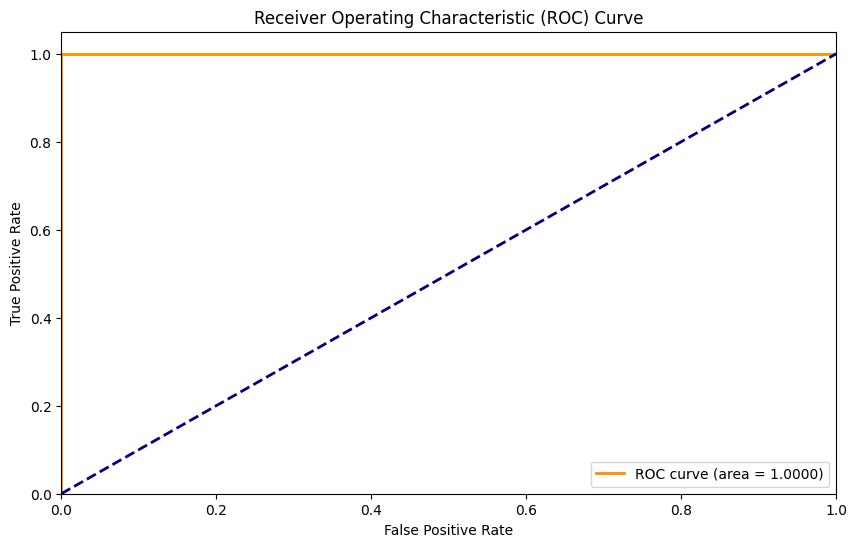

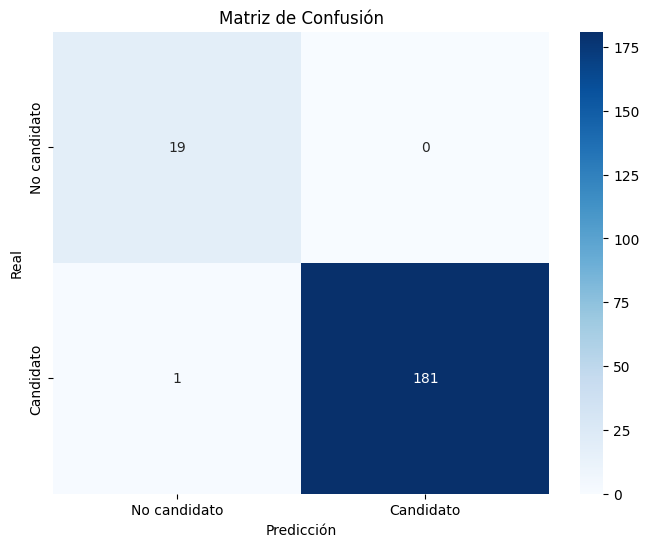

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Función para graficar la curva ROC
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Función para graficar la matriz de confusión
def plot_confusion_matrix_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No candidato', 'Candidato'], yticklabels=['No candidato', 'Candidato'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')
    plt.show()

# Graficar la curva ROC para Logistic Regression L1
plot_roc_curve(best_logreg_l1, X_test_scaled, y_test)

# Graficar la matriz de confusión para Logistic Regression L1
plot_confusion_matrix_model(best_logreg_l1, X_test_scaled, y_test)




---



# **Seleccionar Candidatos Ideales**

In [7]:
import pandas as pd
from IPython.display import display, HTML

# Umbral de decisión
threshold = 0.9

# Obtener las probabilidades predichas de los mejores modelos
y_prob_logreg_l1 = best_logreg_l1.predict_proba(X_test_scaled)[:, 1]
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

# Determinar candidatos ideales basados en el umbral para Logistic Regression L1
ideal_candidates_logreg_l1 = X_test[y_prob_logreg_l1 >= threshold].copy()
ideal_candidates_logreg_l1['Predicted_Probability'] = y_prob_logreg_l1[y_prob_logreg_l1 >= threshold]

# Determinar candidatos ideales basados en el umbral para XGBoost
ideal_candidates_xgb = X_test[y_prob_xgb >= threshold].copy()
ideal_candidates_xgb['Predicted_Probability'] = y_prob_xgb[y_prob_xgb >= threshold]

# Determinar candidatos ideales basados en el umbral para Decision Tree
ideal_candidates_tree = X_test[y_prob_tree >= threshold].copy()
ideal_candidates_tree['Predicted_Probability'] = y_prob_tree[y_prob_tree >= threshold]

# Configuración de estilo de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.expand_frame_repr', False)

# Función para mostrar los resultados de manera estética
def display_candidates(model_name, candidates_df):
    if not candidates_df.empty:
        print(f"\nCandidatos ideales según {model_name}:")
        display(HTML(candidates_df.to_html(index=False)))
    else:
        print(f"\nNo hay candidatos ideales según {model_name} con el umbral de {threshold}.")

# Mostrar los resultados
display_candidates("Logistic Regression L1", ideal_candidates_logreg_l1)
display_candidates("XGBoost", ideal_candidates_xgb)
display_candidates("Decision Tree", ideal_candidates_tree)



Candidatos ideales según Logistic Regression L1:


Age,Height,Weight,FAF,NCP,FCVC,CH2O,TUE,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,Predicted_Probability
39.13,1.56,76.66,0.00e+00,3.00,2.00,1.44,0.00e+00,True,True,False,True,False,False,False,True,False,1.00
29.74,1.82,87.67,2.00e+00,3.00,3.00,1.17,0.00e+00,False,True,False,True,False,False,False,False,True,1.00
30.61,1.76,118.57,1.08e+00,3.00,2.92,2.24,1.48e+00,True,True,False,True,False,False,False,True,False,1.00
26.20,1.89,121.07,1.24e+00,3.00,2.42,2.90,5.56e-01,True,True,False,True,False,False,False,True,False,1.00
55.00,1.60,102.32,5.94e-03,3.00,3.00,1.00,5.66e-01,True,True,False,True,False,False,False,True,False,1.00
30.16,1.53,78.03,0.00e+00,1.92,2.03,1.80,0.00e+00,True,True,False,True,False,False,False,False,True,1.00
30.19,1.76,112.10,0.00e+00,3.00,1.39,2.02,7.31e-01,True,True,False,True,False,False,False,True,False,1.00
26.68,1.82,118.33,7.04e-01,3.00,1.98,2.36,1.07e-02,True,True,False,True,False,False,False,True,False,1.00
50.00,1.64,104.99,9.49e-02,3.00,3.00,1.20,6.04e-01,True,True,False,True,False,False,False,True,False,1.00
23.00,1.67,80.94,7.89e-01,2.40,2.00,1.40,1.54e+00,True,True,False,True,False,False,False,False,True,1.00



Candidatos ideales según XGBoost:


Age,Height,Weight,FAF,NCP,FCVC,CH2O,TUE,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,Predicted_Probability
39.13,1.56,76.66,0.00e+00,3.00,2.00,1.44,0.00e+00,True,True,False,True,False,False,False,True,False,1.00
29.74,1.82,87.67,2.00e+00,3.00,3.00,1.17,0.00e+00,False,True,False,True,False,False,False,False,True,1.00
30.61,1.76,118.57,1.08e+00,3.00,2.92,2.24,1.48e+00,True,True,False,True,False,False,False,True,False,1.00
26.20,1.89,121.07,1.24e+00,3.00,2.42,2.90,5.56e-01,True,True,False,True,False,False,False,True,False,1.00
55.00,1.60,102.32,5.94e-03,3.00,3.00,1.00,5.66e-01,True,True,False,True,False,False,False,True,False,1.00
30.16,1.53,78.03,0.00e+00,1.92,2.03,1.80,0.00e+00,True,True,False,True,False,False,False,False,True,1.00
30.19,1.76,112.10,0.00e+00,3.00,1.39,2.02,7.31e-01,True,True,False,True,False,False,False,True,False,1.00
26.68,1.82,118.33,7.04e-01,3.00,1.98,2.36,1.07e-02,True,True,False,True,False,False,False,True,False,1.00
50.00,1.64,104.99,9.49e-02,3.00,3.00,1.20,6.04e-01,True,True,False,True,False,False,False,True,False,1.00
23.00,1.67,80.94,7.89e-01,2.40,2.00,1.40,1.54e+00,True,True,False,True,False,False,False,False,True,1.00



Candidatos ideales según Decision Tree:


Age,Height,Weight,FAF,NCP,FCVC,CH2O,TUE,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,Predicted_Probability
39.13,1.56,76.66,0.00e+00,3.00,2.00,1.44,0.00e+00,True,True,False,True,False,False,False,True,False,1.0
29.74,1.82,87.67,2.00e+00,3.00,3.00,1.17,0.00e+00,False,True,False,True,False,False,False,False,True,1.0
30.61,1.76,118.57,1.08e+00,3.00,2.92,2.24,1.48e+00,True,True,False,True,False,False,False,True,False,1.0
26.20,1.89,121.07,1.24e+00,3.00,2.42,2.90,5.56e-01,True,True,False,True,False,False,False,True,False,1.0
55.00,1.60,102.32,5.94e-03,3.00,3.00,1.00,5.66e-01,True,True,False,True,False,False,False,True,False,1.0
30.16,1.53,78.03,0.00e+00,1.92,2.03,1.80,0.00e+00,True,True,False,True,False,False,False,False,True,1.0
30.19,1.76,112.10,0.00e+00,3.00,1.39,2.02,7.31e-01,True,True,False,True,False,False,False,True,False,1.0
26.68,1.82,118.33,7.04e-01,3.00,1.98,2.36,1.07e-02,True,True,False,True,False,False,False,True,False,1.0
50.00,1.64,104.99,9.49e-02,3.00,3.00,1.20,6.04e-01,True,True,False,True,False,False,False,True,False,1.0
23.00,1.67,80.94,7.89e-01,2.40,2.00,1.40,1.54e+00,True,True,False,True,False,False,False,False,True,1.0


In [8]:
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

# Umbral de decisión
threshold = 0.9

# Obtener las probabilidades predichas de los mejores modelos
y_prob_logreg_l1 = best_logreg_l1.predict_proba(X_test_scaled)[:, 1]
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

# Determinar candidatos ideales basados en el umbral para Logistic Regression L1
ideal_candidates_logreg_l1 = X_test[y_prob_logreg_l1 >= threshold].copy()
ideal_candidates_logreg_l1['Predicted_Probability'] = y_prob_logreg_l1[y_prob_logreg_l1 >= threshold]

# Determinar candidatos ideales basados en el umbral para XGBoost
ideal_candidates_xgb = X_test[y_prob_xgb >= threshold].copy()
ideal_candidates_xgb['Predicted_Probability'] = y_prob_xgb[y_prob_xgb >= threshold]

# Determinar candidatos ideales basados en el umbral para Decision Tree
ideal_candidates_tree = X_test[y_prob_tree >= threshold].copy()
ideal_candidates_tree['Predicted_Probability'] = y_prob_tree[y_prob_tree >= threshold]

# Configuración de estilo de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.expand_frame_repr', False)

# Función para mostrar los resultados de manera estética
def display_candidates(model_name, candidates_df):
    if not candidates_df.empty:
        print(f"\nCandidatos ideales según {model_name}:")
        display(HTML(candidates_df.to_html(index=False)))
    else:
        print(f"\nNo hay candidatos ideales según {model_name} con el umbral de {threshold}.")

# Mostrar los resultados
display_candidates("Logistic Regression L1", ideal_candidates_logreg_l1)
display_candidates("XGBoost", ideal_candidates_xgb)
display_candidates("Decision Tree", ideal_candidates_tree)

# Función para crear gráficos de los candidatos ideales
def visualize_candidates(model_name, candidates_df):
    if not candidates_df.empty:
        fig = px.scatter_matrix(candidates_df,
                                dimensions=['Age', 'Height', 'Weight', 'FAF', 'CH2O', 'TUE', 'Predicted_Probability'],
                                color='Predicted_Probability',
                                title=f'Candidatos Ideales según {model_name}',
                                labels={'Predicted_Probability': 'Probabilidad Predicha'})
        fig.update_layout(width=1200, height=800)
        fig.show()
    else:
        print(f"\nNo hay candidatos ideales según {model_name} con el umbral de {threshold}.")

# Visualizar los candidatos ideales
visualize_candidates("Logistic Regression L1", ideal_candidates_logreg_l1)
visualize_candidates("XGBoost", ideal_candidates_xgb)
visualize_candidates("Decision Tree", ideal_candidates_tree)



Candidatos ideales según Logistic Regression L1:


Age,Height,Weight,FAF,NCP,FCVC,CH2O,TUE,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,Predicted_Probability
39.13,1.56,76.66,0.00e+00,3.00,2.00,1.44,0.00e+00,True,True,False,True,False,False,False,True,False,1.00
29.74,1.82,87.67,2.00e+00,3.00,3.00,1.17,0.00e+00,False,True,False,True,False,False,False,False,True,1.00
30.61,1.76,118.57,1.08e+00,3.00,2.92,2.24,1.48e+00,True,True,False,True,False,False,False,True,False,1.00
26.20,1.89,121.07,1.24e+00,3.00,2.42,2.90,5.56e-01,True,True,False,True,False,False,False,True,False,1.00
55.00,1.60,102.32,5.94e-03,3.00,3.00,1.00,5.66e-01,True,True,False,True,False,False,False,True,False,1.00
30.16,1.53,78.03,0.00e+00,1.92,2.03,1.80,0.00e+00,True,True,False,True,False,False,False,False,True,1.00
30.19,1.76,112.10,0.00e+00,3.00,1.39,2.02,7.31e-01,True,True,False,True,False,False,False,True,False,1.00
26.68,1.82,118.33,7.04e-01,3.00,1.98,2.36,1.07e-02,True,True,False,True,False,False,False,True,False,1.00
50.00,1.64,104.99,9.49e-02,3.00,3.00,1.20,6.04e-01,True,True,False,True,False,False,False,True,False,1.00
23.00,1.67,80.94,7.89e-01,2.40,2.00,1.40,1.54e+00,True,True,False,True,False,False,False,False,True,1.00



Candidatos ideales según XGBoost:


Age,Height,Weight,FAF,NCP,FCVC,CH2O,TUE,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,Predicted_Probability
39.13,1.56,76.66,0.00e+00,3.00,2.00,1.44,0.00e+00,True,True,False,True,False,False,False,True,False,1.00
29.74,1.82,87.67,2.00e+00,3.00,3.00,1.17,0.00e+00,False,True,False,True,False,False,False,False,True,1.00
30.61,1.76,118.57,1.08e+00,3.00,2.92,2.24,1.48e+00,True,True,False,True,False,False,False,True,False,1.00
26.20,1.89,121.07,1.24e+00,3.00,2.42,2.90,5.56e-01,True,True,False,True,False,False,False,True,False,1.00
55.00,1.60,102.32,5.94e-03,3.00,3.00,1.00,5.66e-01,True,True,False,True,False,False,False,True,False,1.00
30.16,1.53,78.03,0.00e+00,1.92,2.03,1.80,0.00e+00,True,True,False,True,False,False,False,False,True,1.00
30.19,1.76,112.10,0.00e+00,3.00,1.39,2.02,7.31e-01,True,True,False,True,False,False,False,True,False,1.00
26.68,1.82,118.33,7.04e-01,3.00,1.98,2.36,1.07e-02,True,True,False,True,False,False,False,True,False,1.00
50.00,1.64,104.99,9.49e-02,3.00,3.00,1.20,6.04e-01,True,True,False,True,False,False,False,True,False,1.00
23.00,1.67,80.94,7.89e-01,2.40,2.00,1.40,1.54e+00,True,True,False,True,False,False,False,False,True,1.00



Candidatos ideales según Decision Tree:


Age,Height,Weight,FAF,NCP,FCVC,CH2O,TUE,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,Predicted_Probability
39.13,1.56,76.66,0.00e+00,3.00,2.00,1.44,0.00e+00,True,True,False,True,False,False,False,True,False,1.0
29.74,1.82,87.67,2.00e+00,3.00,3.00,1.17,0.00e+00,False,True,False,True,False,False,False,False,True,1.0
30.61,1.76,118.57,1.08e+00,3.00,2.92,2.24,1.48e+00,True,True,False,True,False,False,False,True,False,1.0
26.20,1.89,121.07,1.24e+00,3.00,2.42,2.90,5.56e-01,True,True,False,True,False,False,False,True,False,1.0
55.00,1.60,102.32,5.94e-03,3.00,3.00,1.00,5.66e-01,True,True,False,True,False,False,False,True,False,1.0
30.16,1.53,78.03,0.00e+00,1.92,2.03,1.80,0.00e+00,True,True,False,True,False,False,False,False,True,1.0
30.19,1.76,112.10,0.00e+00,3.00,1.39,2.02,7.31e-01,True,True,False,True,False,False,False,True,False,1.0
26.68,1.82,118.33,7.04e-01,3.00,1.98,2.36,1.07e-02,True,True,False,True,False,False,False,True,False,1.0
50.00,1.64,104.99,9.49e-02,3.00,3.00,1.20,6.04e-01,True,True,False,True,False,False,False,True,False,1.0
23.00,1.67,80.94,7.89e-01,2.40,2.00,1.40,1.54e+00,True,True,False,True,False,False,False,False,True,1.0


Evaluación Adicional

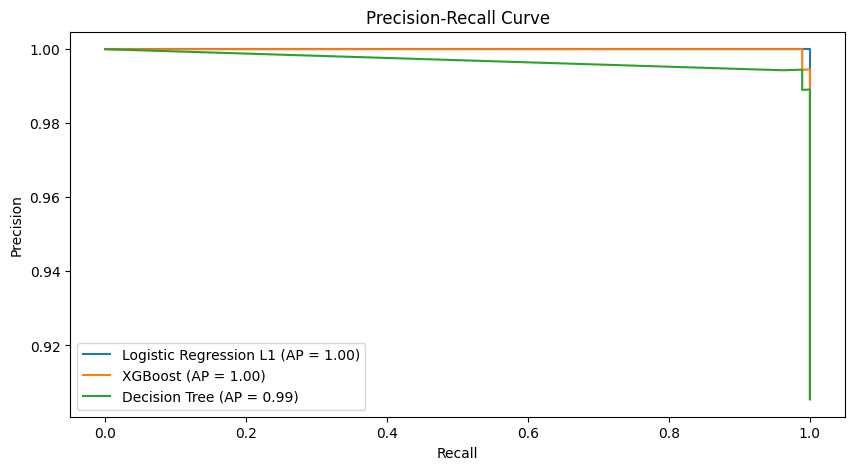

In [9]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calcular Precision-Recall Curve y Average Precision para Logistic Regression L1
precision_logreg_l1, recall_logreg_l1, _ = precision_recall_curve(y_test, y_prob_logreg_l1)
average_precision_logreg_l1 = average_precision_score(y_test, y_prob_logreg_l1)

# Calcular Precision-Recall Curve y Average Precision para XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
average_precision_xgb = average_precision_score(y_test, y_prob_xgb)

# Calcular Precision-Recall Curve y Average Precision para Decision Tree
precision_tree, recall_tree, _ = precision_recall_curve(y_test, y_prob_tree)
average_precision_tree = average_precision_score(y_test, y_prob_tree)

# Visualizar Precision-Recall Curves
plt.figure(figsize=(10, 5))
plt.plot(recall_logreg_l1, precision_logreg_l1, label='Logistic Regression L1 (AP = %0.2f)' % average_precision_logreg_l1)
plt.plot(recall_xgb, precision_xgb, label='XGBoost (AP = %0.2f)' % average_precision_xgb)
plt.plot(recall_tree, precision_tree, label='Decision Tree (AP = %0.2f)' % average_precision_tree)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Conclusión:
Logistic Regression L1 y XGBoost son los modelos con mejor rendimiento, ya que ambos tienen una precisión promedio perfecta y mantienen una alta precisión en casi todos los valores de recall.
Decision Tree también es un buen modelo, pero tiene una precisión promedio ligeramente menor, lo que sugiere que puede no ser tan efectivo como los otros dos en términos de balancear precisión y recall.



---



Calculadora Interactiva

In [10]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Cargar la base de datos desde GitHub para obtener datos de entrenamiento
url = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
data = pd.read_csv(url)

# Calcular IMC (BMI)
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Crear una nueva columna binaria que indique si la persona es candidata a cirugía
def is_candidate(row):
    if 'Obesity' in row or 'Overweight' in row:
        return 1
    else:
        return 0

data['Candidate'] = data['NObeyesdad'].apply(is_candidate)

# Selección de características
features = ['Age', 'Gender', 'BMI', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'FAF', 'CALC']
data['Gender'] = data['Gender'].apply(lambda x: 'Male' if x == 'Hombre' else 'Female')

X = data[features]
y = data['Candidate']

# Codificación de variables categóricas
X = pd.get_dummies(X, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC'], drop_first=True)

# Escalado de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamiento del modelo de Regresión Logística L1
logreg_l1 = LogisticRegression(C=100, solver='lbfgs')
logreg_l1.fit(X_scaled, y)

# Entrenamiento del modelo de XGBoost
xgb = XGBClassifier()
xgb.fit(X, y)

# Crear widgets interactivos para la entrada del usuario
gender_widget = widgets.Dropdown(options=['Male', 'Female'], description='Gender')
age_widget = widgets.IntSlider(min=18, max=100, step=1, description='Age')
height_widget = widgets.FloatSlider(min=1.0, max=2.5, step=0.01, description='Height (m)')
weight_widget = widgets.FloatSlider(min=30, max=300, step=1, description='Weight (kg)')
family_history_widget = widgets.Dropdown(options=['Sí', 'No'], description='Family History of Overweight')
favc_widget = widgets.Dropdown(options=['Sí', 'No'], description='Frequent Consumption of High Caloric Food (FAVC)')
smoke_widget = widgets.Dropdown(options=['Sí', 'No'], description='Smoking Habit')
caec_widget = widgets.Dropdown(options=['Frecuentemente', 'A veces', 'Nunca'], description='Consumption of Food Between Meals (CAEC)')
scc_widget = widgets.Dropdown(options=['Sí', 'No'], description='Calories Consumption Monitoring (SCC)')
faf_widget = widgets.FloatSlider(min=0, max=7, step=0.1, description='Physical Activity Frequency (FAF)')
calc_widget = widgets.Dropdown(options=['A veces', 'No', 'Desconocido'], description='Consumption of Alcohol (CALC)')

# Función para predecir si el individuo es candidato a cirugía bariátrica
def predict_candidate(gender, age, height, weight, family_history, favc, smoke, caec, scc, faf, calc):
    bmi = weight / (height ** 2)

    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'BMI': [bmi],
        'family_history_with_overweight': [family_history],
        'FAVC': [favc],
        'SMOKE': [smoke],
        'CAEC': [caec],
        'SCC': [scc],
        'FAF': [faf],
        'CALC': [calc]
    })

    input_data = pd.get_dummies(input_data, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC'], drop_first=True)

    # Asegurarse de que las columnas de entrada coincidan con las columnas de entrenamiento
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    input_scaled = scaler.transform(input_data)
    prob_logreg_l1 = logreg_l1.predict_proba(input_scaled)[0, 1]
    prob_xgb = xgb.predict_proba(input_data)[0, 1]

    return {
        'Logistic Regression L1': prob_logreg_l1,
        'XGBoost': prob_xgb,
        'Age': age,
        'BMI': bmi,
        'Candidate': 1 if prob_logreg_l1 >= 0.5 else 0
    }

# Función para mostrar el resultado
def show_result(button):
    results = predict_candidate(
        gender_widget.value, age_widget.value, height_widget.value, weight_widget.value,
        family_history_widget.value, favc_widget.value, smoke_widget.value,
        caec_widget.value, scc_widget.value, faf_widget.value, calc_widget.value
    )
    result_logreg_l1.value = f"Logistic Regression L1: {results['Logistic Regression L1']:.2f}"
    result_xgb.value = f"XGBoost: {results['XGBoost']:.2f}"
    candidate_result.value = f"Candidato a Cirugía Bariátrica: {'Sí' if results['Candidate'] == 1 else 'No'}"
    plot_result(results)

# Función para graficar el resultado
def plot_result(results):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=[results['Age']],
        y=[results['BMI']],
        mode='markers',
        marker=dict(
            size=15,
            color='blue' if results['Candidate'] == 1 else 'red',
            symbol='circle'
        ),
        name='Candidate'
    ))

    fig.update_layout(
        title='Candidato a Cirugía Bariátrica',
        xaxis_title='Age',
        yaxis_title='BMI',
        showlegend=False
    )

    fig.show()

# Crear widgets para mostrar el resultado
result_logreg_l1 = widgets.Label()
result_xgb = widgets.Label()
candidate_result = widgets.Label()
button = widgets.Button(description="Calcular")
button.on_click(show_result)

# Mostrar widgets
display(
    gender_widget, age_widget, height_widget, weight_widget,
    family_history_widget, favc_widget, smoke_widget, caec_widget,
    scc_widget, faf_widget, calc_widget, button, result_logreg_l1, result_xgb, candidate_result
)


Dropdown(description='Gender', options=('Male', 'Female'), value='Male')

IntSlider(value=18, description='Age', min=18)

FloatSlider(value=1.0, description='Height (m)', max=2.5, min=1.0, step=0.01)

FloatSlider(value=30.0, description='Weight (kg)', max=300.0, min=30.0, step=1.0)

Dropdown(description='Family History of Overweight', options=('Sí', 'No'), value='Sí')

Dropdown(description='Frequent Consumption of High Caloric Food (FAVC)', options=('Sí', 'No'), value='Sí')

Dropdown(description='Smoking Habit', options=('Sí', 'No'), value='Sí')

Dropdown(description='Consumption of Food Between Meals (CAEC)', options=('Frecuentemente', 'A veces', 'Nunca'…

Dropdown(description='Calories Consumption Monitoring (SCC)', options=('Sí', 'No'), value='Sí')

FloatSlider(value=0.0, description='Physical Activity Frequency (FAF)', max=7.0)

Dropdown(description='Consumption of Alcohol (CALC)', options=('A veces', 'No', 'Desconocido'), value='A veces…

Button(description='Calcular', style=ButtonStyle())

Label(value='')

Label(value='')

Label(value='')